#Building Linear Regression Model From Scratch


###Approach 1

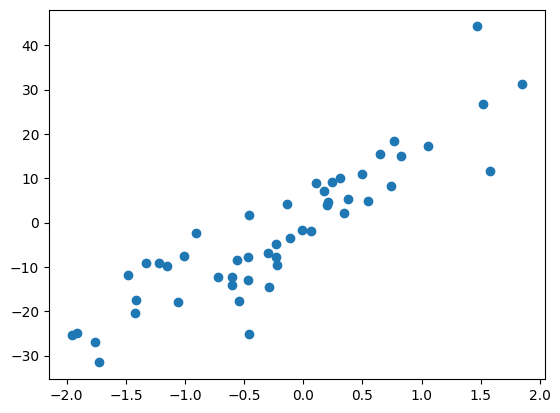

m: 15.03406071732991, c: 1.1256025001410368


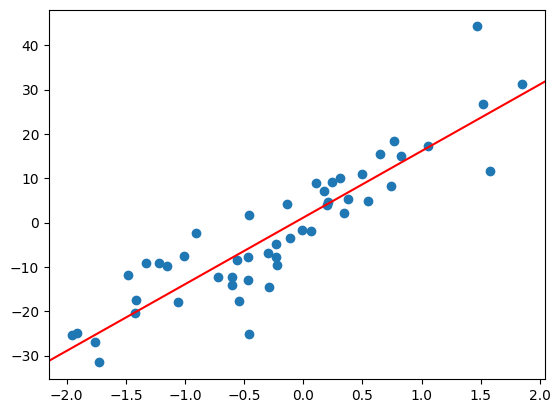

The cost function is: 431.9940747405397


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, noise=7, random_state=42)
plt.scatter(X,y)
plt.show()

def cost_function(X,y, m,c):
    y_pred = m*X +  c
    cost = np.mean((y-y_pred)**2)
    return cost

def gradient_descent(X, y, m, c, lr=0.01):
    # n= len(y)
    # X = X.flatten()
    y_pred = m*X.T + c
    # m_gradient = (-2/n) * np.sum(X * (y - y_pred))
    # c_gradient = (-2/n) * np.sum(y - y_pred)
    m_gradient = np.mean(-2*X.T*(y-y_pred))
    c_gradient = np.mean(-2*(y-y_pred))
    m = m - (lr * m_gradient)
    c = c - (lr * c_gradient)
    return m,c
"""Another way to write gradient function without using ".flatten" attribute
  def gradient_descent(X, y, m, c, lr=0.01):
    # n= len(y)
    y_pred = m*X.T + c
    # m_gradient = (-2/n) * np.sum(X * (y - y_pred))
    # c_gradient = (-2/n) * np.sum(y - y_pred)
    m_gradient = np.mean(-2*X.T*(y-y_pred))
    c_gradient = np.mean(-2*(y-y_pred))
    m = m - (lr * m_gradient)
    c = c - (lr * c_gradient)
    return m,c
"""

epochs = 1000
m,c=0,0
for i in range(epochs):
    m,c = gradient_descent(X,y, m, c, lr=0.01)

print(f"m: {m}, c: {c}")

plt.scatter(X,y)
plt.axline(xy1=(0, c), slope=m, color='red')
plt.show()
cost = cost_function(X,y, m,c)
print(f"The cost function is: {cost}")


###Approach 2

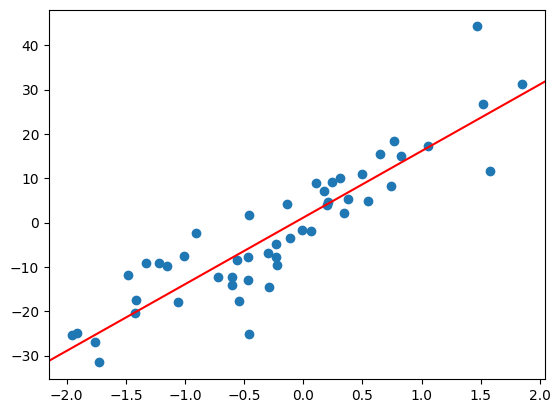

In [2]:
X=X.flatten()
m_new, c_new = np.polyfit(X, y, 1)
plt.scatter(X,y)
plt.axline(xy1=(0, c), slope=m, color='red')
plt.show()

What is need for ".flatten" attribute? What difference does it makes?

(50, 1)


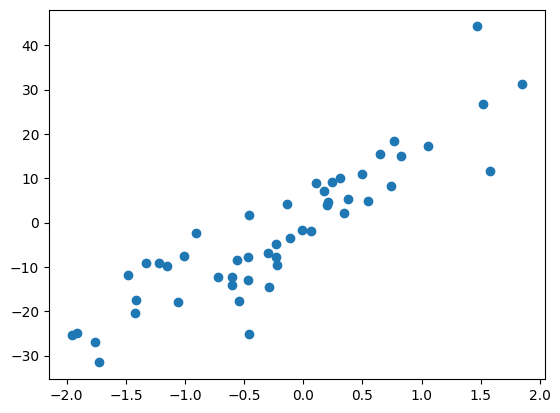


 

(50,)


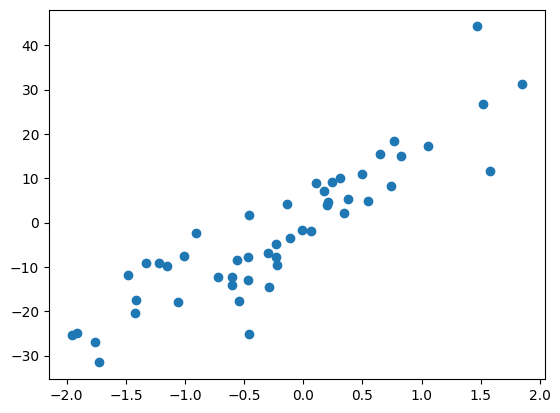

In [3]:
X, y = make_regression(n_samples=50, n_features=1, noise=7, random_state=42)
plt.scatter(X,y)
print(X.shape)
plt.show()
print("\n \n")
X = X.flatten()
plt.scatter(X,y)
print(X.shape)
plt.show()

##Before .flatten():
X is a 2D array (a matrix) with a shape of (50, 1). Imagine it as a column of 50 rows, where each row contains one value.

##After .flatten():
X becomes a 1D array (a vector) with a shape of (50,). Imagine it as a single flat list of 50 values.

###Approach 3
same concept but different method


In [4]:
class LinearRegression:
  def __init__(self, lr, n_iters):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      dw = (1/n_samples)*np.dot(X.T,(y_pred)-y)
      db = (1/n_samples)*np.sum(y_pred-y)
      # Or you can do this.
      # As for gradient decent we need to go in opposite direction of gradient

      # dw = (-1/n_samples)*np.dot(X.T,(y-y_pred))
      # db = (-1/n_samples)*np.sum(y-y_pred)
      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

  def loss(self, y, y_pred):
    # y_pred = np.dot(X, self.weights) + self.bias
    loss = np.mean((y-y_pred)**2)
    return loss

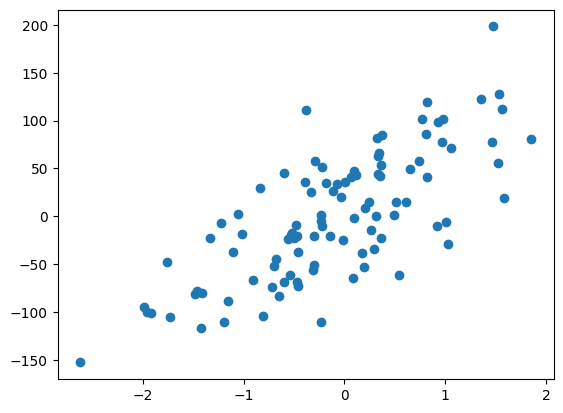


The MSE of the model is: 2442.3638726287877



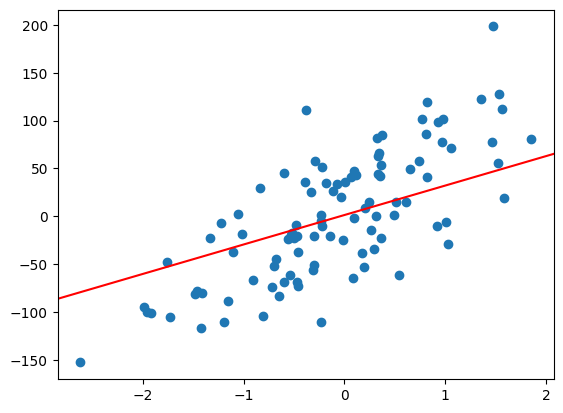

In [5]:
from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples = 100, n_features =1, noise =50, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1234)
# plt.scatter(X_train, y_train)
# plt.show()
plt.scatter(X, y)
plt.show()

reg = LinearRegression(lr=0.01, n_iters=100)
reg.fit(X, y)
y_pred = reg.predict(X)

cost_function = reg.loss(y,y_pred)
print(f"\nThe MSE of the model is: {cost_function}\n")

plt.scatter(X, y)
plt.axline(xy1=(0, reg.bias), slope=reg.weights[0], color='red')
plt.show()

#Direct method using sklearn

In [6]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.5606306161971462

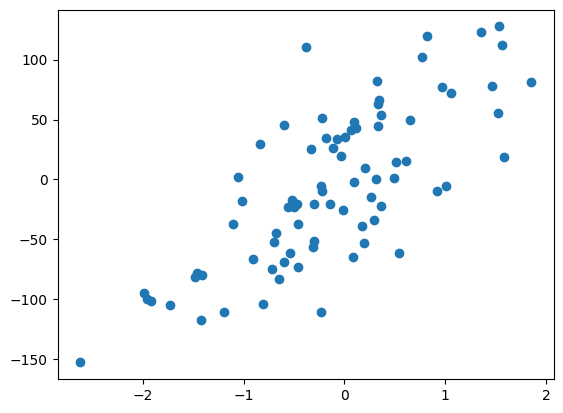


The mean square error of the model is: 2605.0557



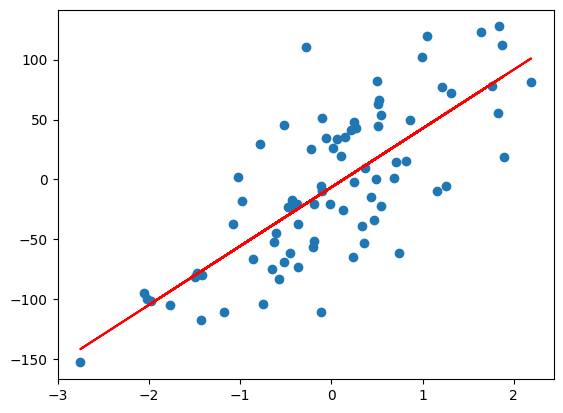

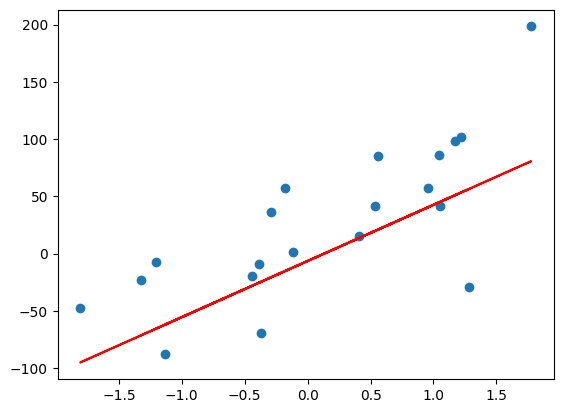

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.scatter(X_train, y_train)
plt.show()
# plt.scatter(X_train_scaled, y_train)
# plt.show()
# plt.plot(X_test_scaled, y_test)

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
y_train_pred = reg.predict(X_train_scaled)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(f"\nThe mean square error of the model is: {MSE:.4f}\n")

plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, y_train_pred, color='red')
plt.show()
plt.scatter(X_test_scaled, y_test)
plt.plot(X_test_scaled, y_pred, color='red')
plt.show()

#What is need for SandardScaler? Why do we use fit.transform for training data and only transform for testing data?
Many machine learning algorithms perform poorly when features have vastly different scales or units.

StandardScaler is a preprocessing tool used to standardize features by centering them around a mean of 0 and scaling them to a standard deviation of 1. This process ensures that all features are on a comparable scale, preventing those with larger numerical ranges from disproportionately influencing the model.

##1. Training Data (fit_transform)
  fit(): The scaler calculates (learns) the necessary parameters—specifically the mean and standard deviation—from the training set.

  transform(): It then uses these calculated parameters to scale the training data.

  Result: The training data is standardized based purely on its own distribution.

##2. Testing Data (transform only)
  Consistency: You must scale the testing data using the exact same mean and standard deviation that were learned from the training data.

  Simulating Reality: In a real-world scenario, you won't know the "future" statistics (mean/std) of new incoming data. You must treat the test set as unseen data that is being processed by a system already established during training.

  Avoiding Data Leakage: If you were to fit on the testing data, the model would indirectly "see" information about the test set distribution before making predictions, leading to overly optimistic and inaccurate performance estimates.